In [12]:
# 需要3.4版本matplotlib
import numpy as np
import os
import matplotlib.pyplot as plt
def standard_fig_save(save_path, file_name, file_format="png"):
    # don't need to set format
    fig_filename = os.path.join(save_path, file_name + '.' + file_format)
#     utils.makedirs(os.path.dirname(fig_filename))
    plt.savefig(fig_filename, dpi=500, bbox_inches='tight', transparent=True, pad_inches=0)
    plt.close()


# 全局设置 pdfa字体
# plt.rcParams['ps.useafm'] = True
# plt.rcParams['pdf.use14corefonts'] = True
# plt.rcParams['text.usetex'] = True

# 全局设置times new roman字体
params={'font.family':'serif',
        'font.serif':'Times New Roman',
#         'font.style':'italic',
        'font.weight':'normal', #or 'blod'
        'font.size':20,#or large,small
        }
plt.rcParams.update(params)

label_font_s = 35
tick_font_s = 30
legend_font_s = 30
linewidth = 1

In [13]:
maps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 
        'Oranges', 'Reds','YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu', 'PuBu', 
        'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

In [14]:
data_path = r"D:\projects\SF\toy_example\data"
dataset = "left"
abs_name = "use_info_{}".format(dataset)

file_name = os.path.join(data_path, abs_name + ".csv")

In [15]:
abs_name

'use_info_left'

In [16]:
cor = np.loadtxt(fname=file_name, skiprows=1)[:, 0:3]
data = np.loadtxt(fname=file_name, skiprows=1)[:, 3:]
x = cor[:, 0]
y = cor[:, 1]
z = cor[:, 2]
cm = maps[2]
size = 10

In [17]:
X = cor
normalization = 'max_min'
for i in [0, 1, 2]:
    h = X[:, i]
    if normalization == 'max_min':
        temp = (h - h.min()) / (h.max() - h.min())
    X[:, i] = temp

In [18]:
def remake(h):
    a = (h - h.min()) / (h.max() - h.min())
    b = (h - h.mean()) / h.std()
    return h

In [19]:
def draw_fig(x, y, z, savename=None, colorbar=False):
    plt. clf()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5), tight_layout=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax0 = ax.scatter(x, y, s=20, c=z, marker='o', cmap=maps[16], alpha=1)
    if colorbar:
        cbar = plt.colorbar(ax0, ax=ax)
        cbar.ax.tick_params(labelsize=25)
    if savename:
        standard_fig_save(r"D:\projects\STAT-GNN\改造中文期刊\形变历史数据", str(savename))

<Figure size 432x288 with 0 Axes>

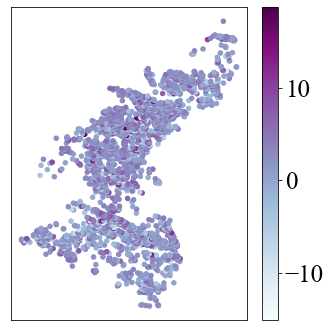

In [20]:
# 原始形态
draw_fig(X[:, 0], X[:, 1], data[:, 5], colorbar=True)
# standard_fig_save(save_path="results/2d", file_name="2d_origin", file_format="png")

# 大量特征图

In [21]:
# 特征图
for i in range(data.shape[1]):
    draw_fig(cor[:, 0], cor[:, 1], data[:, i], i, True)

<Figure size 432x288 with 0 Axes>

<Figure size 360x360 with 0 Axes>

找到特定范围的点

<Figure size 432x288 with 0 Axes>

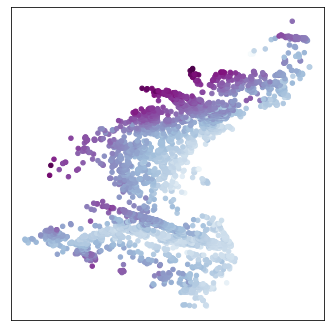

In [22]:
# 方位点
draw_fig(cor[:, 0], cor[:, 1], cor[:, 2])

<Figure size 432x288 with 0 Axes>

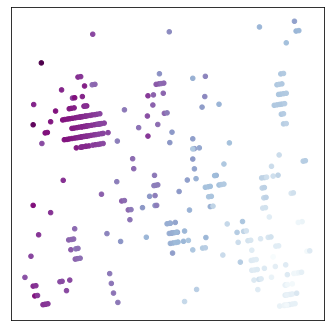

In [23]:
x_min, x_max = 0.3, 0.5
y_min, y_max = 0.5, 0.6
temp = cor.copy()
temp = temp[temp[:, 0]>=x_min]
temp = temp[temp[:, 0]<=x_max]

temp = temp[temp[:, 1]>=y_min]
temp = temp[temp[:, 1]<=y_max]

draw_fig(temp[:, 0], temp[:, 1], temp[:, 2])

# 失败的等高线绘制

In [24]:
print(selected.shape)
selected = temp

NameError: name 'selected' is not defined

找到经纬度的边界和插值范围，将数据进行插值，然后按照下面的方法进行绘制。

In [ ]:
from scipy import interpolate
f = interpolate.interp2d(selected[:, 0], selected[:, 1], selected[:, 2], kind='cubic')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
dx=0.01;dy=0.01
x=np.arange(-2.0,2.0,dx)
y=np.arange(-2.0,2.0,dy)
X,Y=x,y

# C=plt.contour(X,Y,f(X,Y),8,colors='black')  #生成等值线图
plt.contourf(X,Y,f(X,Y),2)
# plt.clable(C,inline=1,fontsize=10)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
dx=0.01;dy=0.01
x=np.arange(-2.0,2.0,dx)
y=np.arange(-2.0,2.0,dy)
X,Y=np.meshgrid(x,y)

C=plt.contour(X,Y,f(X,Y),8,colors='black')  #生成等值线图
plt.contourf(X,Y,f(X,Y),8)
# plt.clable(C,inline=1,fontsize=10)

In [ ]:
from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z, kind='cubic')

In [ ]:
import matplotlib.pyplot as plt
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)
plt.plot(x, z[0, :], 'ro-', xnew, znew[0, :], 'b-')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
dx=0.01;dy=0.01
x=np.arange(-2.0,2.0,dx)
y=np.arange(-2.0,2.0,dy)
X,Y=np.meshgrid(x,y)
# def f(x,y):
#     return(1-y**5+x**5)*np.exp(-x**2-y**2)
C=plt.contour(X,Y,f(X,Y),8,colors='black')  #生成等值线图
plt.contourf(X,Y,f(X,Y),8)
plt.clable(C,inline=1,fontsize=10)

# 在某个固定区间进行插值，检验其效果

In [25]:
interpolation = [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]
for idx in range(len(interpolation)):
    if interpolation[idx] == 0:
        stak1[idx] = base[idx]
        ok[idx] = base[idx]
        knn[idx] = base[idx]
        kpmf[idx] = base[idx]

IndexError: list index out of range

In [26]:
cl1 = ["#4eb446", "#5EC967","#6fb446", "#65da20", "#da9520", "#fd8f35", "#fc7d14"] 
cl2 = ["#000000", "#CC3333", "#4685B4", "#2065da", "#3820da", "#208bda", "#1493fc"]
idx = -1
color1 = cl1[idx]
color2 = cl2[idx]
linewidth = 2
markersize = 15

In [27]:
data[3, :]

array([ 1.485,  9.335, -0.031, -0.099, -1.299,  3.049,  2.003,  2.423,
       -0.478,  1.932,  7.673, -6.774,  1.359, -1.919, -2.854, -5.387,
       -4.27 , -3.613, -2.106, -3.153, -4.766])

In [28]:

ymin = -7
ymax = 12
# plt.vlines(0, ymin, ymax, colors = "r", linestyles = "dashed")
# plt.vlines(1, ymin, ymax, colors = "r", linestyles = "dashed")
# plt.vlines(7, ymin, ymax, colors = "r", linestyles = "dashed")
# plt.vlines(8, ymin, ymax, colors = "r", linestyles = "dashed")
# plt.vlines(14, ymin, ymax, colors = "r", linestyles = "dashed")
# plt.vlines(15, ymin, ymax, colors = "r", linestyles = "dashed")


# 

Text(0.5, 0, 'Time stamp')

<Figure size 432x288 with 0 Axes>

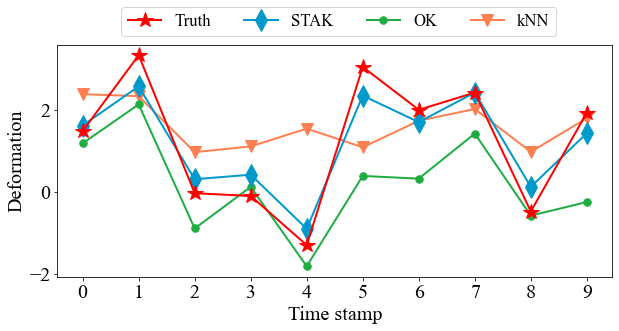

In [29]:
base = [ 1.485,  3.335, -0.031, -0.099, -1.299,  3.049,  2.003,  2.423, -0.478,  1.932,  7.673, -6.774,  1.359]
kpmf = [ 5.368,  3.181,  0.584,  4.234, -1.289,  3.012, -5.787,  1.53 ,-3.086, 1.526,  3.433]
stak1 = [ 1.62,  2.575, 0.31, 0.42, -0.899,  2.349,  1.703,  2.423, 0.123,  1.432]
ok = [  1.185,   2.135,   -0.892,   0.123,  -1.813,   0.39 ,  0.324, 1.423,  -0.578, -0.247]
knn = [ 2.385,  2.335, 0.97 ,  1.11 ,  1.544,  1.089,  1.735,  2.023, 0.978, 1.798]

plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 5), tight_layout=True)
ax.plot(base[0:10], label="Truth", marker='*', zorder=10, c='red', linestyle='-', markersize=markersize+1, linewidth=linewidth)
ax.plot(stak1[0:10], label="STAK", marker='d', zorder=9, c="#0099CC",linestyle='-', markersize=markersize, linewidth=linewidth)
ax.plot(ok[0:10], label="OK", marker='.', zorder=5, linestyle='-',c="#1fad43", markersize=markersize, linewidth=linewidth)
ax.plot(knn[0:10], label="kNN", marker='v', zorder=2, linestyle='-', c='#FF7F50',markersize=markersize-3, linewidth=linewidth)
# ax.plot(kpmf[0:10], label="KPMF", marker='s', zorder=1, c="#8a1fad", linestyle='-', markersize=markersize-3, linewidth=linewidth)
ax.set_xticks(range(10))
# plt.legend()
ax.legend(ncol=5, bbox_to_anchor=(0.1, 1),loc='lower left', fontsize='small')
plt.ylabel('Deformation')
plt.xlabel('Time stamp')
# standard_fig_save(r"D:\projects\STAT-GNN\改造中文期刊\形变历史数据", "时间插值")

Text(0.5, 0, 'Time stamp')

<Figure size 432x288 with 0 Axes>

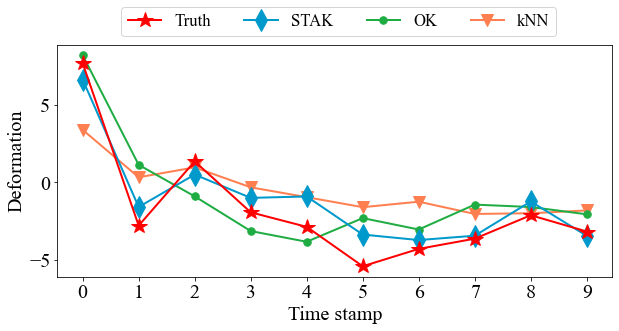

In [30]:
base = [ 7.673, -2.774,  1.359, -1.919, -2.854, -5.387, -4.27 , -3.613, -2.106, -3.153]
stak1 = [ 6.62,  -1.575, 0.51, -0.99, -0.899,  -3.349,  -3.703,  -3.423, -1.223,  -3.432]
ok = [  8.185,   1.135,   -0.892,   -3.123,  -3.813,   -2.29 ,  -3.024, -1.423,  -1.578, -2.047]
knn = [ 3.385,  0.335, 0.97 ,  -0.311 ,  -0.944,  -1.589,  -1.235,  -2.023, -1.978, -1.798]

plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 5), tight_layout=True)
ax.plot(base[0:10], label="Truth", marker='*', zorder=10, c='red', linestyle='-', markersize=markersize+1, linewidth=linewidth)
ax.plot(stak1[0:10], label="STAK", marker='d', zorder=9, c="#0099CC",linestyle='-', markersize=markersize, linewidth=linewidth)
ax.plot(ok[0:10], label="OK", marker='.', zorder=5, linestyle='-',c="#1fad43", markersize=markersize, linewidth=linewidth)
ax.plot(knn[0:10], label="kNN", marker='v', zorder=2, linestyle='-', c='#FF7F50',markersize=markersize-3, linewidth=linewidth)
# ax.plot(kpmf[0:10], label="KPMF", marker='s', zorder=1, c="#8a1fad", linestyle='-', markersize=markersize-3, linewidth=linewidth)
ax.set_xticks(range(10))
# plt.legend()
ax.legend(ncol=5, bbox_to_anchor=(0.1, 1),loc='lower left', fontsize='small')
plt.ylabel('Deformation')
plt.xlabel('Time stamp')
# standard_fig_save(r"D:\projects\STAT-GNN\改造中文期刊\形变历史数据", "时间插值2")

# 不同的残缺率

不同的残缺率下的不同的模型的性能表现

In [110]:
stak = [ 0.987,  0.957, 0.887]
ok = [ 0.971,   0.947,  0.789]
knn = [ 0.961, 0.931, 0.727]
kpmf = [ 0.917, 0.854,  0.667]
plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8.5, 5), tight_layout=True)
ax.plot(stak[0:3], label="STAK", marker='d', zorder=9, c="#0099CC",linestyle='-', markersize=markersize, linewidth=linewidth)
ax.plot(ok[0:3], label="OK", marker='.', zorder=5, linestyle='-',c="#1fad43", markersize=markersize+1, linewidth=linewidth)
ax.plot(knn[0:3], label="kNN", marker='v', zorder=2, linestyle='-', c='#FF7F50',markersize=markersize-2, linewidth=linewidth)
ax.plot(kpmf[0:3], label="KPMF", marker='s', zorder=10, c='red', linestyle='-', markersize=markersize-1, linewidth=linewidth)
# ax.plot(kpmf[0:10], label="KPMF", marker='s', zorder=1, c="#8a1fad", linestyle='-', markersize=markersize-3, linewidth=linewidth)
ax.set_xticks((0, 1, 2))
ax.set_xticklabels((0.05, 0.1, 0.2))
ax.legend(ncol=5, bbox_to_anchor=(0.05, 1), loc='lower left', fontsize='small')
plt.ylabel('ACC')
plt.xlabel('Missing ratio')
standard_fig_save(r"E:\MyProjects\WLLE\数据挖掘", "缺失比例")

<Figure size 432x288 with 0 Axes>

# 在某时间节点的空间中插值

In [31]:
timestamp = 2

In [32]:
locs = [10, 213, 12, 45, 53]

In [33]:
dataspace = data[locs, timestamp]

In [34]:
base = data[locs, timestamp+2]
ok = data[locs, timestamp+3]
stak1 = data[locs, timestamp+4]
knn = data[locs, timestamp+5]
kpmf = data[locs, timestamp+6]

In [43]:
base = [5.387, 4.27 , 3.613, 2.506, 3.153, 4.121]
stak1 = [5.487, 4.57 , 3.373, 2.456, 3.453, 4.221]
ok = [5.687, 3.97 , 4.003, 2.636, 3.553, 3.881]
knn = [4.287, 4.07 , 3.913, 3.306, 3.693, 3.721]
kpmf = [5.287, 4.57 , 2.913, 3.206, 4.053, 4.421]

plt. clf()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 7), tight_layout=True)
x = np.arange(6)
total_width, n = 0.8, 6
width = total_width / n
x = x - (total_width - width) / 2
ax.set_ylim((2,6))
ax.set_yticks((2, 3, 4, 5, 6))

ax.bar(x + width * 0, base, label="Truth", width=width, hatch='x')
ax.bar(x + width * 1, stak1, label="STAK", width=width, hatch=r'\\')
ax.bar(x + width * 2, ok, label="OK", width=width, hatch='/')
ax.bar(x + width * 3, knn, label="kNN", width=width, hatch='|')
ax.bar(x + width * 4, kpmf, label="KPMF", width=width, hatch='-')
plt.legend()
plt.ylabel('Deformation')
plt.xlabel('Different locations')
# standard_fig_save(r"D:\projects\STAT-GNN\改造中文期刊\形变历史数据", "空间插值")

<Figure size 432x288 with 0 Axes>

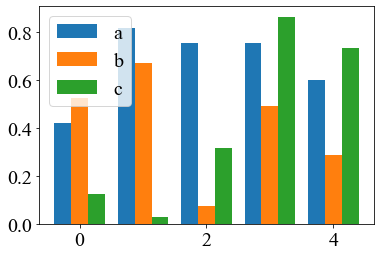

In [18]:
size = 5
x = np.arange(size)
a = np.random.random(size)
b = np.random.random(size)
c = np.random.random(size)

total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label='a')
plt.bar(x + width, b, width=width, label='b')
plt.bar(x + 2 * width, c, width=width, label='c')
plt.legend()
plt.show()

In [19]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(11.5, 6))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'black' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

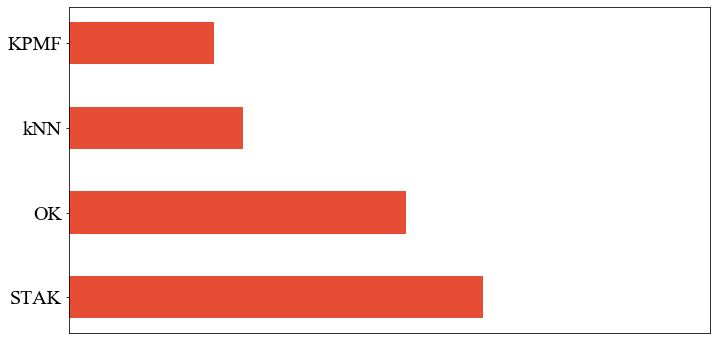

In [20]:
category_names = ['Error$\leq$0.3', '0.3<Error$\leq$0.5','0.5<Error$\leq$1', '1<Error']
results = {
    'KPMF': [22.7, 38.4, 24.3, 14.6],
    'kNN': [27.2, 50.1, 15.8, 6.9],
    'OK': [52.6, 31.2, 10.9, 5.3],
    'STAK': [64.5, 23.5, 7.7, 4.3],
}

# 归一化
# for k in results:
#     s = sum(results[k])
#     for i in range(len(results[k])):
#         results[k][i] = int(results[k][i] / s * 10000) / 100
        
survey(results, category_names)
# plt.show()
# standard_fig_save(r"D:\projects\STAT-GNN\改造中文期刊\形变历史数据", "百分比精确率")
